In [106]:

!pip install geopandas


In [0]:
import pandas as pd 
import geopandas as gpd
import descartes 
from shapely.geometry import Point , Polygon
import matplotlib.pyplot as plt

%matplotlib inline 

In [0]:
streetmap = gpd.read_file('/content/korea_shp/KOR_adm2.shp')

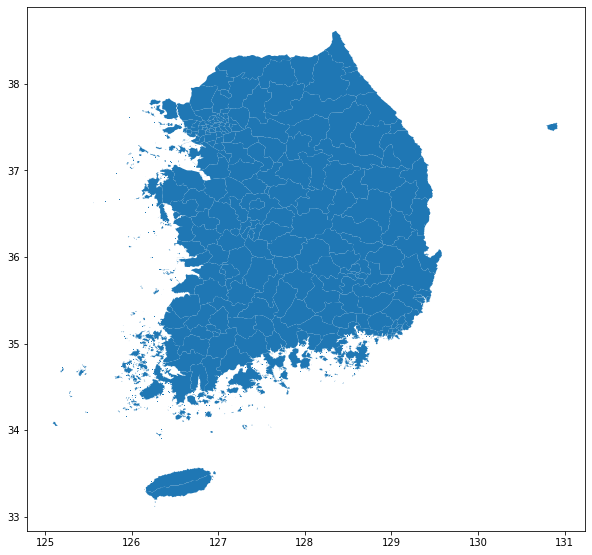

In [109]:
fig , ax = plt.subplots(figsize = (10,10))
streetmap.plot(ax=ax)

In [0]:
df = pd.read_csv('/content/csv files/route.csv')

In [111]:
crs = {'init' : 'epsg:4326'}
df.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [112]:
geometry = [Point(xy) for xy in zip(df['longitude'] , df['latitude'])]
geometry[:3]

In [113]:
new_df = gpd.GeoDataFrame(df , crs = crs , geometry = geometry)
new_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,id,date,province,city,visit,latitude,longitude,geometry
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680,POINT (126.44068 37.46046)
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558,POINT (126.66856 37.47883)
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884,POINT (126.80188 37.56214)
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627,POINT (127.00563 37.56745)
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680,POINT (126.44068 37.46046)


In [0]:
visit = {'airport': 0 ,
         'hospital_isolated' :1 , 
         'clinic' : 2 ,
         'hotel' : 3 ,
         'store' :4 , 
         'restaurant' : 5 ,
         'cafe' : 6 ,
         'etc':7 ,
         'bus_terminal' : 8,
         'movie_theater' : 9 ,
         'hair_salon' : 10 ,
         'hospital' : 11 ,
         'church' : 12 ,
         'office':13 ,
         'train_station': 14 ,
         'company' : 15 ,
         'market' : 16}
new_df['visit_new'] = [visit[place] for place in new_df['visit']] 

In [115]:
new_df.head()

,id,date,province,city,visit,latitude,longitude,geometry,visit_new
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680,POINT (126.44068 37.46046),0
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558,POINT (126.66856 37.47883),1
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884,POINT (126.80188 37.56214),0
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627,POINT (127.00563 37.56745),1
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680,POINT (126.44068 37.46046),0


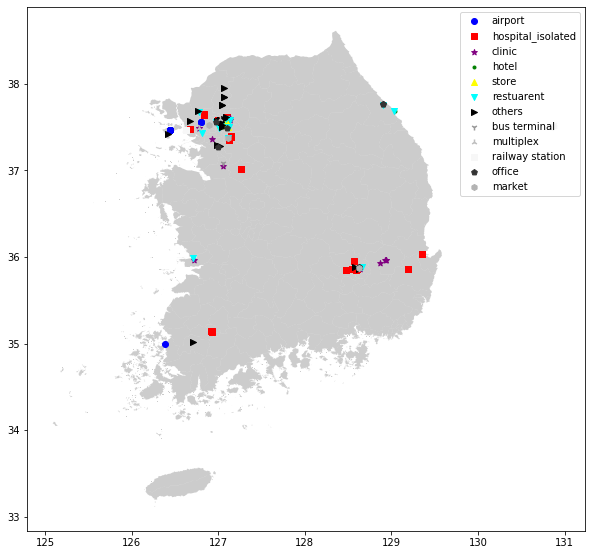

In [117]:
s1 = 20
fig , ax = plt.subplots(figsize = (10,10))
streetmap.plot(ax = ax , alpha = 0.4 , color = 'grey')
new_df[new_df['visit_new'] == 0].plot(ax = ax  ,color = 'blue' , marker = 'o' , label = 'airport')
new_df[new_df['visit_new'] == 1].plot(ax = ax  ,color = 'red' , marker = ',' , label = 'hospital_isolated')
new_df[new_df['visit_new'] == 2].plot(ax = ax  ,color = 'purple' , marker = '*' , label = 'clinic')
new_df[new_df['visit_new'] == 3].plot(ax = ax  ,color = 'green' , marker = '.' , label = 'hotel')
new_df[new_df['visit_new'] == 4].plot(ax = ax  ,color = 'yellow' , marker = '^' , label = 'store')
new_df[new_df['visit_new'] == 5].plot(ax = ax  ,color = 'cyan' , marker = 'v' , label = 'restuarent')

new_df[new_df['visit_new'] == 7].plot(ax = ax  ,color = 'black' , marker = '>' , label = 'others')
new_df[new_df['visit_new'] == 8].plot(ax = ax  ,color = '0.6' , marker = '1' , label = 'bus terminal')
new_df[new_df['visit_new'] == 9].plot(ax = ax  ,color = '0.75' , marker = '2' , label = 'multiplex')

new_df[new_df['visit_new'] == 13].plot(ax = ax  ,color = '0.97' , marker = 's' , label = 'railway station')
new_df[new_df['visit_new'] == 14].plot(ax = ax  ,color = '0.2' , marker = 'p' , label = 'office')
new_df[new_df['visit_new'] == 15].plot(ax = ax  ,color = '0.7' , marker = 'h' , label = 'market')

plt.legend(prop = {'size' : 10})

